In [1352]:
df = bt.data['STRATEX-BINANCE-F']

In [346]:
def rolling_discretize_vectorized(df, window_size=120, n_bins=5):
    def discretize_last_point(window):
        if np.isnan(window).any() or len(np.unique(window)) < n_bins:
            return np.nan
        try:
            bins = pd.qcut(window, q=n_bins, labels=False, duplicates='drop')
            return bins[-1]
        except ValueError:
            return np.nan

    return df.rolling(window=window_size, min_periods=window_size).apply(discretize_last_point, raw=True)

In [1353]:
TOP_UNIVERSE = ['ARB-USDT', 'BNB-USDT', 'BTC-USDT', 'DOGE-USDT', 
    'ETH-USDT', 'MATIC-USDT', 'SOL-USDT', 'XRP-USDT', 
    'ADA-USDT', 'OP-USDT', 'LINK-USDT', 'SUI-USDT', 
    'AVAX-USDT', 'LTC-USDT', 'BCH-USDT']

In [5766]:
prices = df['close'][TOP_UNIVERSE]
prices

ticker,ARB-USDT,BNB-USDT,BTC-USDT,DOGE-USDT,ETH-USDT,MATIC-USDT,SOL-USDT,XRP-USDT,ADA-USDT,OP-USDT,LINK-USDT,SUI-USDT,AVAX-USDT,LTC-USDT,BCH-USDT
endRange,,,,,,,,,,,,,,,
2020-05-15 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-15 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-15 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-15 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31 22:00:00,0.51370001,533.59997559,59026.69921875,0.10153,2516.46997070,0.42089999,135.84599304,0.56590003,0.34610000,1.42460001,11.06900024,0.80419999,22.81399918,65.29000092,323.08999634
2024-08-31 22:30:00,0.51310003,533.45001221,59006.69921875,0.10136,2515.26000977,0.41920000,135.59899902,0.56730002,0.34520000,1.42279994,11.03100014,0.80049998,22.77599907,65.11000061,322.38000488
2024-08-31 23:00:00,0.51330000,533.51000977,58998.89843750,0.10127,2515.72998047,0.41900000,135.32099915,0.56709999,0.34509999,1.42079997,11.02000046,0.79960001,22.74099922,65.05000305,322.35998535


In [1262]:
prices = df['close'][TOP_UNIVERSE]
disc_windows_day = rolling_discretize_vectorized(prices.fillna(0), window_size=48, n_bins=5)

In [1263]:
from scipy.stats import entropy

def rolling_entropy(df_discrete, window_size=60, n_bins=5):
    def shannon_entropy_window(window):
        if np.isnan(window).any():
            return np.nan
        counts = np.bincount(window.astype(int), minlength=n_bins)
        probs = counts / np.sum(counts)
        return entropy(probs, base=2)

    return df_discrete.rolling(window=window_size, min_periods=window_size).apply(shannon_entropy_window, raw=True)


In [1267]:
entropy_df_day_prices = rolling_entropy(disc_windows_day, window_size=48, n_bins = 5)

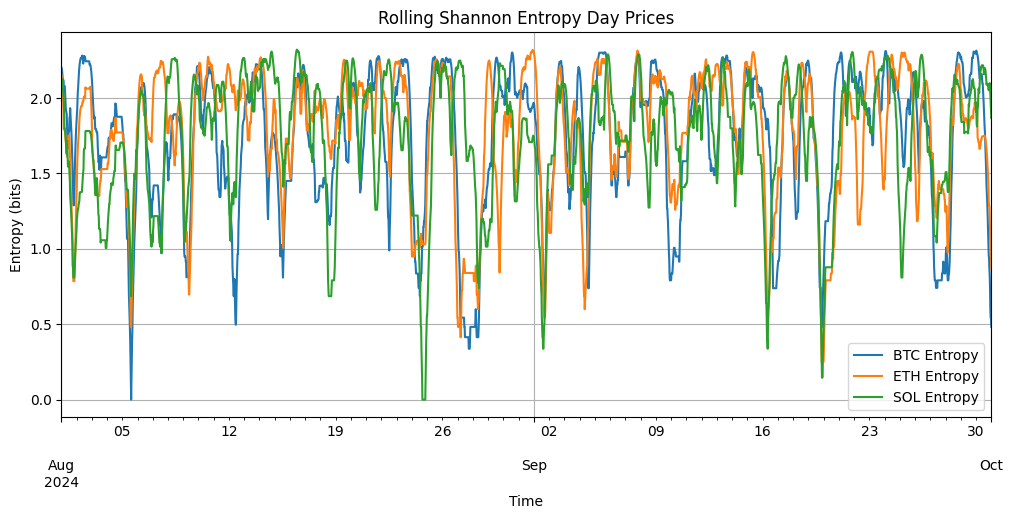

In [1269]:

plt.figure(figsize=(12, 5))
entropy_df_day_prices['BTC-USDT'][entropy_df_day_prices['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Entropy')
entropy_df_day_prices['ETH-USDT'][entropy_df_day_prices['ETH-USDT'].index >= '2024-08-01 00:00:00'].plot(label='ETH Entropy')
entropy_df_day_prices['SOL-USDT'][entropy_df_day_prices['SOL-USDT'].index >= '2024-08-01 00:00:00'].plot(label='SOL Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Day Prices")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

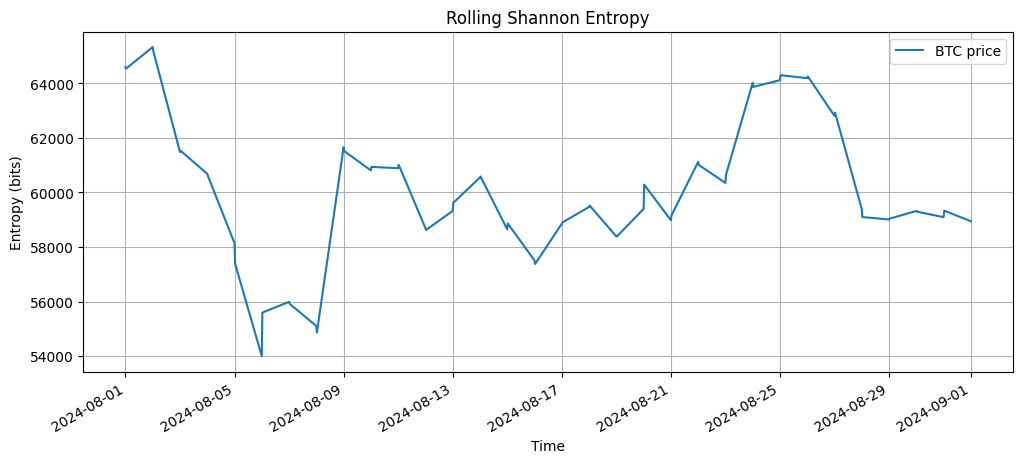

In [6435]:
plt.figure(figsize=(12, 5))
(prices['BTC-USDT'])[(prices['BTC-USDT'].index >= '2024-08-01 00:00:00') * (prices['BTC-USDT'].index.hour == 0)].plot(label='BTC price')
# np.log(prices['ETH-USDT'])[(prices['ETH-USDT'].index >= '2024-08-01 00:00:00') * (prices['BTC-USDT'].index.hour == 0)].plot(label='ETH log price')
# np.log(prices['SOL-USDT'])[(prices['SOL-USDT'].index >= '2024-08-01 00:00:00') * (prices['BTC-USDT'].index.hour == 0)].plot(label='SOL log price')
plt.legend()
plt.title("Rolling Shannon Entropy")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

In [1311]:
trend_btc = (np.abs(prices['BTC-USDT'] - prices['BTC-USDT'].shift(48)) / prices['BTC-USDT'].shift(48))
month_trend_btc = trend[(trend.index >= '2024-08-01 00:00:00')]

In [1304]:
month_trend

endRange
2024-08-01 00:00:00    0.02354163
2024-08-01 00:30:00    0.02205758
2024-08-01 01:00:00    0.02542603
2024-08-01 01:30:00    0.02626761
2024-08-01 02:00:00    0.03163616
                          ...    
2024-09-30 22:00:00    0.03282203
2024-09-30 22:30:00    0.03277338
2024-09-30 23:00:00    0.03315792
2024-09-30 23:30:00    0.03294434
2024-10-01 00:00:00    0.03445273
Name: BTC-USDT, Length: 2929, dtype: float64

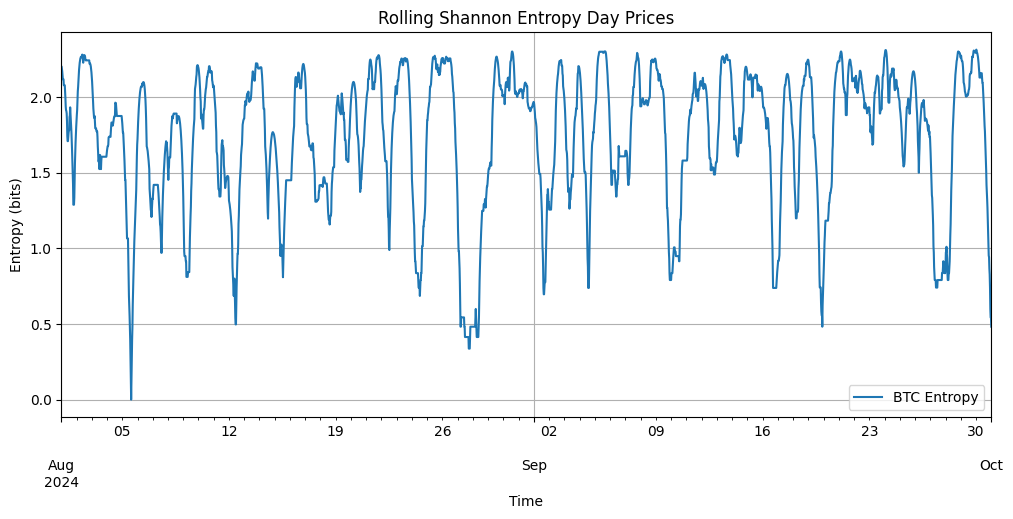

In [1291]:

plt.figure(figsize=(12, 5))
entropy_df_day_prices['BTC-USDT'][entropy_df_day_prices['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Day Prices")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

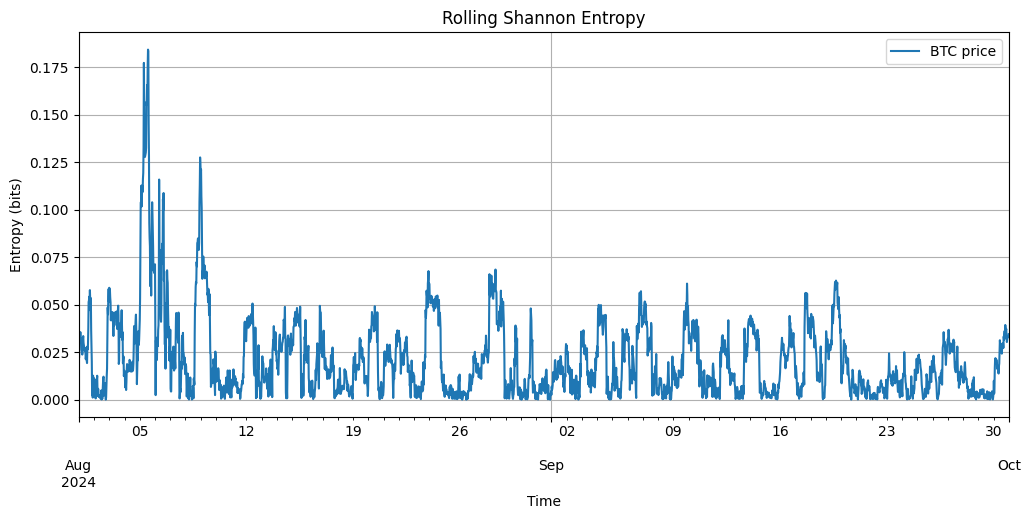

In [1305]:
plt.figure(figsize=(12, 5))
month_trend.plot(label='BTC price')
# np.log(prices['ETH-USDT'])[(prices['ETH-USDT'].index >= '2024-08-01 00:00:00') * (prices['BTC-USDT'].index.hour == 0)].plot(label='ETH log price')
# np.log(prices['SOL-USDT'])[(prices['SOL-USDT'].index >= '2024-08-01 00:00:00') * (prices['BTC-USDT'].index.hour == 0)].plot(label='SOL log price')
plt.legend()
plt.title("Rolling Shannon Entropy")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()


## Описание графика

На графике отображена скользящая энтропия Шеннона (в битах) для активов BTC и ETH за август 2024 года.

    По оси X — временная шкала (даты),

    По оси Y — значение энтропии.
    Энтропия рассчитана по дискретизированным значениям в скользящем окне, что позволяет анализировать локальную структуру поведения цен.

    В начале августа BTC показывает высокую энтропию, затем происходят чередования фаз упорядоченности и хаоса.

    Примерно 5, 18 и 26 августа наблюдаются резкие падения энтропии до ~0, особенно у BTC. Это может указывать на:

        Флэт/консолидацию,

        Локальный тренд без изменений состояния,

        Потенциальную подготовку к сильному движению.

    ETH, в целом, показывает более сглаженную структуру, но также имеет моменты синхронного падения энтропии с BTC.

## Как можно использовать в анализе

    Фильтр рыночных режимов:

        Энтропия < 1: фаза накопления → готовность к импульсу.

        Энтропия > 2: активная фаза, высокая неопределённость.

    Триггеры для стратегий:

        Низкая энтропия → трейдить breakout.

        Высокая энтропия → использовать mean-reversion или избегать сделок.

    Дополнение к теханализу:

        Можно накладывать энтропию на ценовой график и искать закономерности: падения энтропии перед пампами/дампами.

In [1453]:
volumes_sell = df['sell_volume'][['BTC-USDT', 'ETH-USDT', 'SOL-USDT']]
disc_windows_vol_sell_day = rolling_discretize_vectorized(volumes_sell.fillna(0), window_size=48, n_bins=5)


KeyboardInterrupt



In [1356]:
entropy_df_vol_sell_day = rolling_entropy(disc_windows_vol_sell_day, window_size=48, n_bins = 5)

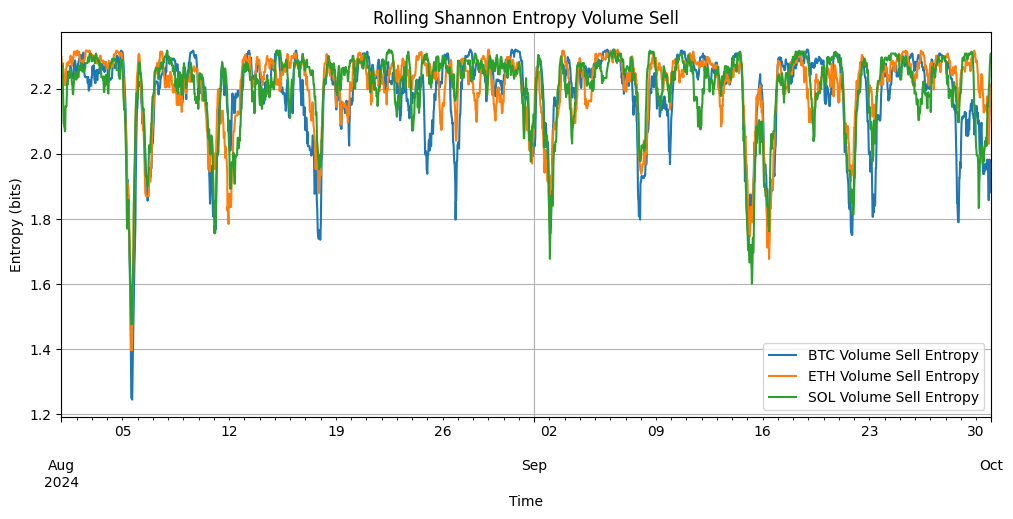

In [1455]:

plt.figure(figsize=(12, 5))
entropy_df_vol_sell_day['BTC-USDT'][entropy_df_vol_sell_day['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Volume Sell Entropy')
entropy_df_vol_sell_day['ETH-USDT'][entropy_df_vol_sell_day['ETH-USDT'].index >= '2024-08-01 00:00:00'].plot(label='ETH Volume Sell Entropy')
entropy_df_vol_sell_day['SOL-USDT'][entropy_df_vol_sell_day['SOL-USDT'].index >= '2024-08-01 00:00:00'].plot(label='SOL Volume Sell Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Volume Sell")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

In [1358]:
volumes_buy = df['buy_volume'][['BTC-USDT', 'ETH-USDT', 'SOL-USDT']]
disc_windows_vol_buy_day  = rolling_discretize_vectorized(volumes_buy.fillna(0), window_size=48, n_bins=5)

In [1359]:
entropy_df_vol_buy_day  = rolling_entropy(disc_windows_vol_buy_day , window_size=48, n_bins = 5)

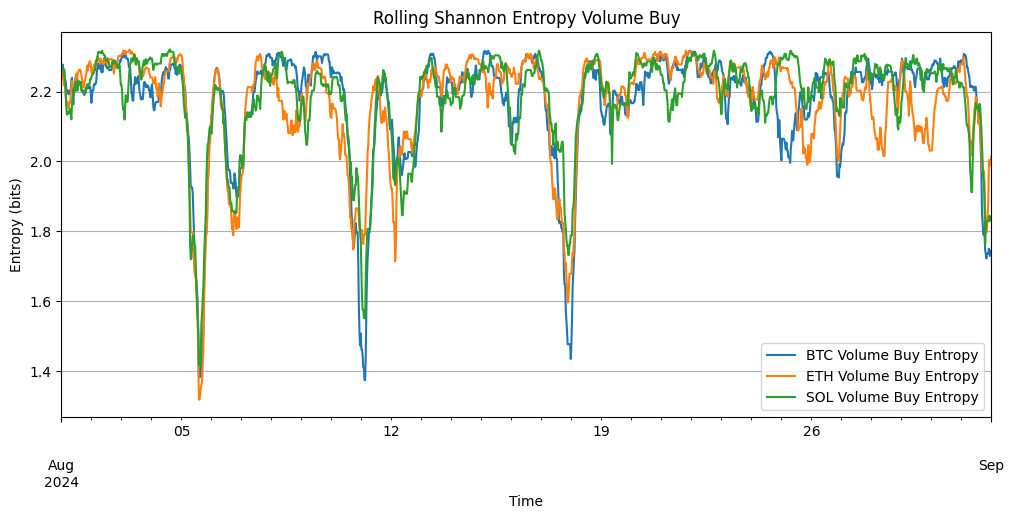

In [6446]:

plt.figure(figsize=(12, 5))
entropy_df_vol_buy['BTC-USDT'][entropy_df_vol_buy['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Volume Buy Entropy')
entropy_df_vol_buy['ETH-USDT'][entropy_df_vol_buy['ETH-USDT'].index >= '2024-08-01 00:00:00'].plot(label='ETH Volume Buy Entropy')
entropy_df_vol_buy['SOL-USDT'][entropy_df_vol_buy['SOL-USDT'].index >= '2024-08-01 00:00:00'].plot(label='SOL Volume Buy Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Volume Buy")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

In [7347]:
!python load_features.py --config config.json

### Интерпретация графика: Rolling Shannon Entropy — Volume Sell (BTC, ETH, SOL)

#### **Что показывает график**

На графике отображена **скользящая энтропия Шеннона** по дискретизированным значениям **объёмов продаж** для трёх активов: `BTC`, `ETH` и `SOL`, за август 2024 года.

- **X-ось** — время (даты),
- **Y-ось** — значение энтропии (в битах),
- Каждая линия — локальное значение энтропии в скользящем окне (например, 60 или 120 тиков).

-  **Высокая энтропия** (например, > 2.2):
  - Продажи распределены по всем уровням примерно равномерно.
  - Поведение рынка "рассыпано", возможно, нет доминирующей силы.
  
-  **Низкая энтропия** (например, < 1.8):
  - Явное преобладание 1–2 состояний (например, постоянные распродажи на одних и тех же уровнях).
  - Может быть признаком **активного давления продавцов**, ботовой торговли или капитуляции.

- Многократные **резкие просадки энтропии** (особенно у BTC и SOL) около:
  - *5, 10–12, 18 и 26 августа*.
  - Это может означать массовые однотипные продажи (например, арбитраж, крупные ордера, страховые ликвидации).
  
- **Восстановление энтропии** до высоких уровней после резких падений:
  - Возвращение разнообразия в поведение трейдеров.
  - Снижение давления продавцов.

- **BTC** демонстрирует наиболее выраженные колебания, за ним следует **SOL**, тогда как **ETH** выглядит более стабильно — возможно, у него менее централизованная структура продаж.

#### **Как использовать такие наблюдения**

| Сценарий | Потенциальный вывод |
|----------|----------------------|
| Энтропия < 1.8 | Централизованное давление продаж — возможно, начало или пик слива |
| Энтропия > 2.2 | Спокойный, "размазанно активный" рынок |
| Совпадение просадок у всех активов | Системный риск, кросс-рынок капитуляция |
| SOL реагирует с лагом на BTC | Можно использовать как **индикатор запаздывания** |




In [1362]:
volumes_diff = (df['sell_volume'] - df['buy_volume'])[['BTC-USDT', 'ETH-USDT', 'SOL-USDT']]
disc_windows_vol_diff_day = rolling_discretize_vectorized(volumes_diff.fillna(0), window_size=48, n_bins=5)

In [1363]:
entropy_df_vol_diff_day  = rolling_entropy(disc_windows_vol_diff_day,  window_size=48, n_bins = 5)

In [ ]:

plt.figure(figsize=(12, 5))
entropy_df_vol_diff['BTC-USDT'][entropy_df_vol_diff['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Volume Diff Entropy')
entropy_df_vol_diff['ETH-USDT'][entropy_df_vol_diff['ETH-USDT'].index >= '2024-08-01 00:00:00'].plot(label='ETH Volume Diff Entropy')
entropy_df_vol_diff['SOL-USDT'][entropy_df_vol_diff['SOL-USDT'].index >= '2024-08-01 00:00:00'].plot(label='SOL Volume Diff Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Volume Diff")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

Интерпретация графика: Rolling Shannon Entropy — Volume Diff (Buy - Sell)
Что измеряется

График показывает скользящую энтропию Шеннона для разности между объёмами покупок и продаж (Buy - Sell) по трём активам: BTC, ETH и SOL.

Энтропия рассчитана по дискретизированным значениям volume_diff в скользящем окне (например, 60 или 120 тиков).
Зачем смотреть на Volume Diff

Это позволяет выявить структуру давления на рынке:

    Кто доминирует — покупатели или продавцы?
    Является ли давление хаотичным или систематическим?

Что видно на графике

    Энтропия выше 2.25 — поведение равномерное, нет выраженной стороны. Вероятен флет.
    Энтропия падает до 2.05–2.15 — всё больше тик-объёмов направлены в одну сторону. Это может означать:
    Капитуляцию,
    Ботовую агрессию,
    Трендовое поведение внутри окна.

BTC демонстрирует наиболее выраженные колебания энтропии, ETH и SOL — более сглаженные, но также с локальными всплесками активности.

# BTC DAY EXPERIMENTS

In [1562]:
trend_btc = (np.abs(prices['BTC-USDT'] - prices['BTC-USDT'].shift(48)) / prices['BTC-USDT'].shift(48))
month_trend_btc = trend_btc[(trend_btc.index >= '2024-08-01 00:00:00')]
trend_btc_signed = ((prices['BTC-USDT'] - prices['BTC-USDT'].shift(48)) / prices['BTC-USDT'].shift(48))
month_trend_btc_signed = trend_btc_signed[(trend_btc_signed.index >= '2024-08-01 00:00:00')]
trend_btc_classification = (np.abs(prices['BTC-USDT'] - prices['BTC-USDT'].shift(48)) / prices['BTC-USDT'].shift(48)) > 0.02
month_trend_btc_classification = trend_btc_classification[(trend_btc_classification.index >= '2024-08-01 00:00:00')]

In [1556]:
month_trend_btc_classification

endRange
2024-08-01 00:00:00    False
2024-08-01 00:30:00    False
2024-08-01 01:00:00    False
2024-08-01 01:30:00    False
2024-08-01 02:00:00     True
                       ...  
2024-09-30 22:00:00     True
2024-09-30 22:30:00     True
2024-09-30 23:00:00     True
2024-09-30 23:30:00     True
2024-10-01 00:00:00     True
Name: BTC-USDT, Length: 2929, dtype: bool

In [1703]:
df = pd.DataFrame({
    'Day horizon': [0.3686, 0.6307],
    'Week horizon': [0.2205, 0.3325]
}, index=['BTC-USDT', 'ETH-USDT'])
df

,Day horizon,Week horizon
BTC-USDT,0.3686,0.2205
ETH-USDT,0.6307,0.3325


# Prices

In [1557]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1563]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_btc = pd.DataFrame(entropy_df_day_prices['BTC-USDT'].copy()[entropy_df_day_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_btc['trend'] = month_trend_btc
df_entropy_btc = df_entropy_btc.rename(columns={'BTC-USDT': 'entropy'})

train_df_btc = df_entropy_btc.loc['2024-08-01':'2024-09-14']
val_df_btc = df_entropy_btc.loc['2024-09-15':'2024-09-21']
test_df_btc = df_entropy_btc.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_btc[['entropy']])
X_val = scaler.transform(val_df_btc[['entropy']])
X_test = scaler.transform(test_df_btc[['entropy']])

y_train = train_df_btc['trend']
y_val = val_df_btc['trend']
y_test = test_df_btc['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0002, R² = 0.2205


In [1559]:
df_entropy_btc = pd.DataFrame(entropy_df_day_prices['BTC-USDT'].copy()[entropy_df_day_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_btc['trend'] = month_trend_btc
df_entropy_btc = df_entropy_btc.rename(columns = {'BTC-USDT': 'entropy'})
train_df_btc = df_entropy_btc.loc['2024-08-01':'2024-09-14']
val_df_btc = df_entropy_btc.loc['2024-09-15':'2024-09-16']
test_df_btc  = df_entropy_btc.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_btc[['entropy']], train_df_btc['trend'])

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_btc[['entropy']])
X_val = scaler.transform(val_df_btc[['entropy']])
X_test = scaler.transform(test_df_btc[['entropy']])

y_train = train_df_btc['trend']
y_val = val_df_btc['trend']
y_test = test_df_btc['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0001, R² = 0.3686


# Signed

In [1534]:
df_entropy_btc = pd.DataFrame(entropy_df_day_prices['BTC-USDT'].copy()[entropy_df_day_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_btc['trend'] = month_trend_btc_signed
df_entropy_btc = df_entropy_btc.rename(columns = {'BTC-USDT': 'entropy'})
train_df_btc = df_entropy_btc.loc['2024-08-01':'2024-09-14']
val_df_btc = df_entropy_btc.loc['2024-09-15':'2024-09-21']
test_df_btc  = df_entropy_btc.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_btc[['entropy']], train_df_btc['trend'])

X_train = scaler.fit_transform(train_df_btc[['entropy']])
X_val = scaler.transform(val_df_btc[['entropy']])
X_test = scaler.transform(test_df_btc[['entropy']])

y_train = train_df_btc['trend']
y_val = val_df_btc['trend']
y_test = test_df_btc['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")

Validation: MSE = 0.0007, R² = -0.2522


In [1536]:
df_entropy_btc = pd.DataFrame(entropy_df_day_prices['BTC-USDT'].copy()[entropy_df_day_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_btc['trend'] = month_trend_btc_signed
df_entropy_btc = df_entropy_btc.rename(columns = {'BTC-USDT': 'entropy'})
train_df_btc = df_entropy_btc.loc['2024-08-01':'2024-09-14']
val_df_btc = df_entropy_btc.loc['2024-09-15':'2024-09-16']
test_df_btc  = df_entropy_btc.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_btc[['entropy']], train_df_btc['trend'])

X_train = scaler.fit_transform(train_df_btc[['entropy']])
X_val = scaler.transform(val_df_btc[['entropy']])
X_test = scaler.transform(test_df_btc[['entropy']])

y_train = train_df_btc['trend']
y_val = val_df_btc['trend']
y_test = test_df_btc['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")

Validation: MSE = 0.0003, R² = -0.2754


# Classification

In [1564]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import pandas as pd

In [1565]:
df_entropy_btc = pd.DataFrame(entropy_df_day_prices['BTC-USDT'].copy()[entropy_df_day_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'])
X_train = df_entropy_btc.loc['2024-08-01':'2024-09-14']
X_val = df_entropy_btc.loc['2024-09-15':'2024-09-16']
X_test = df_entropy_btc.loc['2024-09-16':'2024-09-30']

y_train = month_trend_btc_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_btc_classification.loc['2024-09-15':'2024-09-16']
y_test = month_trend_btc_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.71      0.98      0.83        53
        True       0.96      0.51      0.67        43

    accuracy                           0.77        96
   macro avg       0.83      0.75      0.75        96
weighted avg       0.82      0.77      0.75        96



In [1566]:
df_entropy_btc = pd.DataFrame(entropy_df_day_prices['BTC-USDT'].copy()[entropy_df_day_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'])
X_train = df_entropy_btc.loc['2024-08-01':'2024-09-14']
X_val = df_entropy_btc.loc['2024-09-15':'2024-09-21']
X_test = df_entropy_btc.loc['2024-09-16':'2024-09-30']

y_train = month_trend_btc_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_btc_classification.loc['2024-09-15':'2024-09-21']
y_test = month_trend_btc_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))



Validation Set:
              precision    recall  f1-score   support

       False       0.69      0.85      0.77       191
        True       0.72      0.50      0.59       145

    accuracy                           0.70       336
   macro avg       0.71      0.68      0.68       336
weighted avg       0.71      0.70      0.69       336



# Prices + Volumes

In [1543]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_btc_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['BTC-USDT'][entropy_df_day_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['BTC-USDT'][entropy_df_vol_sell_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['BTC-USDT'][entropy_df_vol_buy_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['BTC-USDT'][entropy_df_vol_diff_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_btc_day['trend'] = month_trend_btc

train_df_btc = entropy_combined_df_btc_day.loc['2024-08-01':'2024-09-14']
val_df_btc = entropy_combined_df_btc_day.loc['2024-09-15':'2024-09-21']
test_df_btc = entropy_combined_df_btc_day.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_btc['trend']
y_val = val_df_btc['trend']
y_test = test_df_btc['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0003, R² = 0.0238


In [1544]:
entropy_combined_df_btc_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['BTC-USDT'][entropy_df_day_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['BTC-USDT'][entropy_df_vol_sell_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['BTC-USDT'][entropy_df_vol_buy_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['BTC-USDT'][entropy_df_vol_diff_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_btc_day['trend'] = month_trend_btc
train_df_btc = entropy_combined_df_btc_day.loc['2024-08-01':'2024-09-14']
val_df_btc = entropy_combined_df_btc_day.loc['2024-09-15':'2024-09-16']
test_df_btc  = entropy_combined_df_btc_day.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_btc['trend']
y_val = val_df_btc['trend']
y_test = test_df_btc['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0002, R² = -0.2856


# Signed

In [1545]:
entropy_combined_df_btc_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['BTC-USDT'][entropy_df_day_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['BTC-USDT'][entropy_df_vol_sell_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['BTC-USDT'][entropy_df_vol_buy_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['BTC-USDT'][entropy_df_vol_diff_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_btc_day['trend'] = month_trend_btc_signed
train_df_btc = entropy_combined_df_btc_day.loc['2024-08-01':'2024-09-14']
val_df_btc = entropy_combined_df_btc_day.loc['2024-09-15':'2024-09-21']
test_df_btc  = entropy_combined_df_btc_day.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']], train_df_btc['trend'])

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_btc['trend']
y_val = val_df_btc['trend']
y_test = test_df_btc['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0007, R² = -0.1641


In [1546]:
entropy_combined_df_btc_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['BTC-USDT'][entropy_df_day_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['BTC-USDT'][entropy_df_vol_sell_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['BTC-USDT'][entropy_df_vol_buy_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['BTC-USDT'][entropy_df_vol_diff_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_btc_day['trend'] = month_trend_btc_signed
train_df_btc = entropy_combined_df_btc_day.loc['2024-08-01':'2024-09-14']
val_df_btc = entropy_combined_df_btc_day.loc['2024-09-15':'2024-09-16']
test_df_btc  = entropy_combined_df_btc_day.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']], train_df_btc['trend'])

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_btc[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_btc['trend']
y_val = val_df_btc['trend']
y_test = test_df_btc['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0001, R² = 0.4373


# Classification

In [1567]:
entropy_combined_df_btc_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['BTC-USDT'][entropy_df_day_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['BTC-USDT'][entropy_df_vol_sell_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['BTC-USDT'][entropy_df_vol_buy_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['BTC-USDT'][entropy_df_vol_diff_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_btc_day.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_btc_day.loc['2024-09-15':'2024-09-16']
X_test = entropy_combined_df_btc_day.loc['2024-09-16':'2024-09-30']

y_train = month_trend_btc_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_btc_classification.loc['2024-09-15':'2024-09-16']
y_test = month_trend_btc_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.67      0.98      0.79        53
        True       0.94      0.40      0.56        43

    accuracy                           0.72        96
   macro avg       0.81      0.69      0.68        96
weighted avg       0.79      0.72      0.69        96



In [1568]:
entropy_combined_df_btc_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['BTC-USDT'][entropy_df_day_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['BTC-USDT'][entropy_df_vol_sell_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['BTC-USDT'][entropy_df_vol_buy_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['BTC-USDT'][entropy_df_vol_diff_day['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_btc_day.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_btc_day.loc['2024-09-15':'2024-09-21']
X_test = entropy_combined_df_btc_day.loc['2024-09-16':'2024-09-30']

y_train = month_trend_btc_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_btc_classification.loc['2024-09-15':'2024-09-21']
y_test = month_trend_btc_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.69      0.83      0.75       191
        True       0.70      0.50      0.58       145

    accuracy                           0.69       336
   macro avg       0.69      0.67      0.67       336
weighted avg       0.69      0.69      0.68       336



# ETH EXPERIMENTS

In [1570]:
trend_eth = (np.abs(prices['ETH-USDT'] - prices['ETH-USDT'].shift(48)) / prices['ETH-USDT'].shift(48))
month_trend_eth = trend_eth[(trend_eth.index >= '2024-08-01 00:00:00')]
trend_eth_signed = ((prices['ETH-USDT'] - prices['ETH-USDT'].shift(48)) / prices['ETH-USDT'].shift(48))
month_trend_eth_signed = trend_eth_signed[(trend_eth_signed.index >= '2024-08-01 00:00:00')]
trend_eth_classification = (np.abs(prices['ETH-USDT'] - prices['ETH-USDT'].shift(48)) / prices['ETH-USDT'].shift(48)) > 0.02
month_trend_eth_classification = trend_eth_classification[(trend_eth_classification.index >= '2024-08-01 00:00:00')]

# Prices

In [1572]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_ETH = pd.DataFrame(entropy_df_day_prices['ETH-USDT'].copy()[entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_ETH['trend'] = month_trend_eth
df_entropy_ETH = df_entropy_ETH.rename(columns={'ETH-USDT': 'entropy'})

train_df_ETH = df_entropy_ETH.loc['2024-08-01':'2024-09-14']
val_df_ETH = df_entropy_ETH.loc['2024-09-15':'2024-09-21']
test_df_ETH = df_entropy_ETH.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy']])
X_val = scaler.transform(val_df_ETH[['entropy']])
X_test = scaler.transform(test_df_ETH[['entropy']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0003, R² = 0.3325


In [1573]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_ETH = pd.DataFrame(entropy_df_day_prices['ETH-USDT'].copy()[entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_ETH['trend'] = month_trend_eth
df_entropy_ETH = df_entropy_ETH.rename(columns={'ETH-USDT': 'entropy'})

train_df_ETH = df_entropy_ETH.loc['2024-08-01':'2024-09-14']
val_df_ETH = df_entropy_ETH.loc['2024-09-15':'2024-09-16']
test_df_ETH = df_entropy_ETH.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy']])
X_val = scaler.transform(val_df_ETH[['entropy']])
X_test = scaler.transform(test_df_ETH[['entropy']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0002, R² = 0.6307


# Signed

In [1574]:
df_entropy_ETH = pd.DataFrame(entropy_df_day_prices['ETH-USDT'].copy()[entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_ETH['trend'] = month_trend_eth_signed
df_entropy_ETH = df_entropy_ETH.rename(columns = {'ETH-USDT': 'entropy'})
train_df_ETH = df_entropy_ETH.loc['2024-08-01':'2024-09-14']
val_df_ETH = df_entropy_ETH.loc['2024-09-15':'2024-09-21']
test_df_ETH  = df_entropy_ETH.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_ETH[['entropy']], train_df_ETH['trend'])

X_train = scaler.fit_transform(train_df_ETH[['entropy']])
X_val = scaler.transform(val_df_ETH[['entropy']])
X_test = scaler.transform(test_df_ETH[['entropy']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")

Validation: MSE = 0.0017, R² = -0.6777


In [1575]:
entropy_combined_df_ETH_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['ETH-USDT'][entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['ETH-USDT'][entropy_df_vol_sell_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['ETH-USDT'][entropy_df_vol_buy_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['ETH-USDT'][entropy_df_vol_diff_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_ETH_day['trend'] = month_trend_eth_signed
train_df_ETH = entropy_combined_df_ETH_day.loc['2024-08-01':'2024-09-14']
val_df_ETH = entropy_combined_df_ETH_day.loc['2024-09-15':'2024-09-16']
test_df_ETH  = entropy_combined_df_ETH_day.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']], train_df_ETH['trend'])

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0003, R² = 0.3775


# Classification

In [1576]:
df_entropy_ETH = pd.DataFrame(entropy_df_day_prices['ETH-USDT'].copy()[entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'])
X_train = df_entropy_ETH.loc['2024-08-01':'2024-09-14']
X_val = df_entropy_ETH.loc['2024-09-15':'2024-09-16']
X_test = df_entropy_ETH.loc['2024-09-16':'2024-09-30']

y_train = month_trend_eth_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_eth_classification.loc['2024-09-15':'2024-09-16']
y_test = month_trend_eth_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.85      0.98      0.91        42
        True       0.98      0.87      0.92        54

    accuracy                           0.92        96
   macro avg       0.92      0.92      0.92        96
weighted avg       0.92      0.92      0.92        96



In [1578]:
df_entropy_ETH = pd.DataFrame(entropy_df_day_prices['ETH-USDT'].copy()[entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'])
X_train = df_entropy_ETH.loc['2024-08-01':'2024-09-14']
X_val = df_entropy_ETH.loc['2024-09-15':'2024-09-21']
X_test = df_entropy_ETH.loc['2024-09-16':'2024-09-30']

y_train = month_trend_eth_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_eth_classification.loc['2024-09-15':'2024-09-21']
y_test = month_trend_eth_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.70      0.79      0.74       145
        True       0.82      0.74      0.78       191

    accuracy                           0.76       336
   macro avg       0.76      0.76      0.76       336
weighted avg       0.77      0.76      0.76       336



# Prices + Volumes

In [1579]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_ETH_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['ETH-USDT'][entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['ETH-USDT'][entropy_df_vol_sell_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['ETH-USDT'][entropy_df_vol_buy_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['ETH-USDT'][entropy_df_vol_diff_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_ETH_day['trend'] = month_trend_eth

train_df_ETH = entropy_combined_df_ETH_day.loc['2024-08-01':'2024-09-14']
val_df_ETH = entropy_combined_df_ETH_day.loc['2024-09-15':'2024-09-21']
test_df_ETH = entropy_combined_df_ETH_day.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0004, R² = -0.0248


In [1580]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_ETH_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['ETH-USDT'][entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['ETH-USDT'][entropy_df_vol_sell_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['ETH-USDT'][entropy_df_vol_buy_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['ETH-USDT'][entropy_df_vol_diff_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_ETH_day['trend'] = month_trend_eth

train_df_ETH = entropy_combined_df_ETH_day.loc['2024-08-01':'2024-09-14']
val_df_ETH = entropy_combined_df_ETH_day.loc['2024-09-15':'2024-09-16']
test_df_ETH = entropy_combined_df_ETH_day.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0007, R² = -0.4944


# Signed

In [1581]:
entropy_combined_df_ETH_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['ETH-USDT'][entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['ETH-USDT'][entropy_df_vol_sell_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['ETH-USDT'][entropy_df_vol_buy_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['ETH-USDT'][entropy_df_vol_diff_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_ETH_day['trend'] = month_trend_eth_signed
train_df_ETH = entropy_combined_df_ETH_day.loc['2024-08-01':'2024-09-14']
val_df_ETH = entropy_combined_df_ETH_day.loc['2024-09-15':'2024-09-21']
test_df_ETH  = entropy_combined_df_ETH_day.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']], train_df_ETH['trend'])

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0018, R² = -0.7396


In [1582]:
entropy_combined_df_ETH_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['ETH-USDT'][entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['ETH-USDT'][entropy_df_vol_sell_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['ETH-USDT'][entropy_df_vol_buy_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['ETH-USDT'][entropy_df_vol_diff_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_ETH_day['trend'] = month_trend_eth_signed
train_df_ETH = entropy_combined_df_ETH_day.loc['2024-08-01':'2024-09-14']
val_df_ETH = entropy_combined_df_ETH_day.loc['2024-09-15':'2024-09-16']
test_df_ETH  = entropy_combined_df_ETH_day.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']], train_df_ETH['trend'])

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0003, R² = 0.3775


# Classification

In [1583]:
entropy_combined_df_ETH_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['ETH-USDT'][entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['ETH-USDT'][entropy_df_vol_sell_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['ETH-USDT'][entropy_df_vol_buy_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['ETH-USDT'][entropy_df_vol_diff_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_ETH_day.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_ETH_day.loc['2024-09-15':'2024-09-16']
X_test = entropy_combined_df_ETH_day.loc['2024-09-16':'2024-09-30']

y_train = month_trend_eth_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_eth_classification.loc['2024-09-15':'2024-09-16']
y_test = month_trend_eth_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.85      0.98      0.91        42
        True       0.98      0.87      0.92        54

    accuracy                           0.92        96
   macro avg       0.92      0.92      0.92        96
weighted avg       0.92      0.92      0.92        96



In [1584]:
entropy_combined_df_ETH_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['ETH-USDT'][entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['ETH-USDT'][entropy_df_vol_sell_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['ETH-USDT'][entropy_df_vol_buy_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['ETH-USDT'][entropy_df_vol_diff_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_ETH_day.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_ETH_day.loc['2024-09-15':'2024-09-21']
X_test = entropy_combined_df_ETH_day.loc['2024-09-16':'2024-09-30']

y_train = month_trend_eth_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_eth_classification.loc['2024-09-15':'2024-09-21']
y_test = month_trend_eth_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.71      0.79      0.75       145
        True       0.82      0.76      0.79       191

    accuracy                           0.77       336
   macro avg       0.77      0.77      0.77       336
weighted avg       0.78      0.77      0.77       336



# SOL EXPERIMENTS

In [1585]:
trend_SOL = (np.abs(prices['SOL-USDT'] - prices['SOL-USDT'].shift(48)) / prices['SOL-USDT'].shift(48))
month_trend_SOL = trend_SOL[(trend_SOL.index >= '2024-08-01 00:00:00')]
trend_SOL_signed = ((prices['SOL-USDT'] - prices['SOL-USDT'].shift(48)) / prices['SOL-USDT'].shift(48))
month_trend_SOL_signed = trend_SOL_signed[(trend_SOL_signed.index >= '2024-08-01 00:00:00')]
trend_SOL_classification = (np.abs(prices['SOL-USDT'] - prices['SOL-USDT'].shift(48)) / prices['SOL-USDT'].shift(48)) > 0.02
month_trend_SOL_classification = trend_SOL_classification[(trend_SOL_classification.index >= '2024-08-01 00:00:00')]

In [1711]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_SOL = pd.DataFrame(entropy_df_day_prices['SOL-USDT'].copy()[entropy_df_day_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_SOL['trend'] = month_trend_SOL
df_entropy_SOL = df_entropy_SOL.rename(columns={'SOL-USDT': 'entropy'})

train_df_SOL = df_entropy_SOL.loc['2024-08-01':'2024-09-14']
val_df_SOL = df_entropy_SOL.loc['2024-09-15':'2024-09-16']
test_df_SOL = df_entropy_SOL.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_SOL[['entropy']])
X_val = scaler.transform(val_df_SOL[['entropy']])
X_test = scaler.transform(test_df_SOL[['entropy']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0004, R² = -0.6677


In [1712]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_SOL = pd.DataFrame(entropy_df_day_prices['SOL-USDT'].copy()[entropy_df_day_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_SOL['trend'] = month_trend_SOL
df_entropy_SOL = df_entropy_SOL.rename(columns={'SOL-USDT': 'entropy'})

train_df_SOL = df_entropy_SOL.loc['2024-08-01':'2024-09-14']
val_df_SOL = df_entropy_SOL.loc['2024-09-15':'2024-09-21']
test_df_SOL = df_entropy_SOL.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_SOL[['entropy']])
X_val = scaler.transform(val_df_SOL[['entropy']])
X_test = scaler.transform(test_df_SOL[['entropy']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0004, R² = 0.4323


# Signed

In [1588]:
df_entropy_SOL = pd.DataFrame(entropy_df_day_prices['SOL-USDT'].copy()[entropy_df_day_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_SOL['trend'] = month_trend_SOL_signed
df_entropy_SOL = df_entropy_SOL.rename(columns = {'SOL-USDT': 'entropy'})
train_df_SOL = df_entropy_SOL.loc['2024-08-01':'2024-09-14']
val_df_SOL = df_entropy_SOL.loc['2024-09-15':'2024-09-21']
test_df_SOL  = df_entropy_SOL.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_SOL[['entropy']], train_df_SOL['trend'])

X_train = scaler.fit_transform(train_df_SOL[['entropy']])
X_val = scaler.transform(val_df_SOL[['entropy']])
X_test = scaler.transform(test_df_SOL[['entropy']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")

Validation: MSE = 0.0020, R² = -0.2059


In [1590]:
df_entropy_SOL = pd.DataFrame(entropy_df_day_prices['SOL-USDT'].copy()[entropy_df_day_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_SOL['trend'] = month_trend_SOL_signed
df_entropy_SOL = df_entropy_SOL.rename(columns = {'SOL-USDT': 'entropy'})
train_df_SOL = df_entropy_SOL.loc['2024-08-01':'2024-09-14']
val_df_SOL = df_entropy_SOL.loc['2024-09-15':'2024-09-16']
test_df_SOL  = df_entropy_SOL.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_SOL[['entropy']], train_df_SOL['trend'])

X_train = scaler.fit_transform(train_df_SOL[['entropy']])
X_val = scaler.transform(val_df_SOL[['entropy']])
X_test = scaler.transform(test_df_SOL[['entropy']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")

Validation: MSE = 0.0005, R² = -1.1685


# Classification

In [1589]:
df_entropy_SOL = pd.DataFrame(entropy_df_day_prices['SOL-USDT'].copy()[entropy_df_day_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'])
X_train = df_entropy_SOL.loc['2024-08-01':'2024-09-14']
X_val = df_entropy_SOL.loc['2024-09-15':'2024-09-16']
X_test = df_entropy_SOL.loc['2024-09-16':'2024-09-30']

y_train = month_trend_SOL_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_SOL_classification.loc['2024-09-15':'2024-09-16']
y_test = month_trend_SOL_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       1.00      0.59      0.74        44
        True       0.74      1.00      0.85        52

    accuracy                           0.81        96
   macro avg       0.87      0.80      0.80        96
weighted avg       0.86      0.81      0.80        96



In [1591]:
df_entropy_SOL = pd.DataFrame(entropy_df_day_prices['SOL-USDT'].copy()[entropy_df_day_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'])
X_train = df_entropy_SOL.loc['2024-08-01':'2024-09-14']
X_val = df_entropy_SOL.loc['2024-09-15':'2024-09-21']
X_test = df_entropy_SOL.loc['2024-09-16':'2024-09-30']

y_train = month_trend_SOL_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_SOL_classification.loc['2024-09-15':'2024-09-21']
y_test = month_trend_SOL_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.82      0.75      0.79       151
        True       0.81      0.86      0.84       185

    accuracy                           0.82       336
   macro avg       0.82      0.81      0.81       336
weighted avg       0.82      0.82      0.81       336



# Prices + Volumes

In [1592]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_ETH_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['ETH-USDT'][entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['ETH-USDT'][entropy_df_vol_sell_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['ETH-USDT'][entropy_df_vol_buy_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['ETH-USDT'][entropy_df_vol_diff_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_ETH_day['trend'] = month_trend_eth

train_df_ETH = entropy_combined_df_ETH_day.loc['2024-08-01':'2024-09-14']
val_df_ETH = entropy_combined_df_ETH_day.loc['2024-09-15':'2024-09-21']
test_df_ETH = entropy_combined_df_ETH_day.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0004, R² = -0.0248


In [1593]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_ETH_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['ETH-USDT'][entropy_df_day_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['ETH-USDT'][entropy_df_vol_sell_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['ETH-USDT'][entropy_df_vol_buy_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['ETH-USDT'][entropy_df_vol_diff_day['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_ETH_day['trend'] = month_trend_eth

train_df_ETH = entropy_combined_df_ETH_day.loc['2024-08-01':'2024-09-14']
val_df_ETH = entropy_combined_df_ETH_day.loc['2024-09-15':'2024-09-16']
test_df_ETH = entropy_combined_df_ETH_day.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0007, R² = -0.4944


# Signed

In [1594]:
entropy_combined_df_SOL_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['SOL-USDT'][entropy_df_day_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['SOL-USDT'][entropy_df_vol_sell_day['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['SOL-USDT'][entropy_df_vol_buy_day['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['SOL-USDT'][entropy_df_vol_diff_day['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_SOL_day['trend'] = month_trend_SOL_signed
train_df_SOL = entropy_combined_df_SOL_day.loc['2024-08-01':'2024-09-14']
val_df_SOL = entropy_combined_df_SOL_day.loc['2024-09-15':'2024-09-21']
test_df_SOL  = entropy_combined_df_SOL_day.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']], train_df_SOL['trend'])

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0021, R² = -0.2668


In [1595]:
entropy_combined_df_SOL_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['SOL-USDT'][entropy_df_day_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['SOL-USDT'][entropy_df_vol_sell_day['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['SOL-USDT'][entropy_df_vol_buy_day['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['SOL-USDT'][entropy_df_vol_diff_day['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_SOL_day['trend'] = month_trend_SOL_signed
train_df_SOL = entropy_combined_df_SOL_day.loc['2024-08-01':'2024-09-14']
val_df_SOL = entropy_combined_df_SOL_day.loc['2024-09-15':'2024-09-16']
test_df_SOL  = entropy_combined_df_SOL_day.loc['2024-09-16':'2024-09-30']
model = LinearRegression()
model.fit(train_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']], train_df_SOL['trend'])

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_day = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0003, R² = -0.2805


# Classification

In [1596]:
entropy_combined_df_SOL_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['SOL-USDT'][entropy_df_day_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['SOL-USDT'][entropy_df_vol_sell_day['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['SOL-USDT'][entropy_df_vol_buy_day['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['SOL-USDT'][entropy_df_vol_diff_day['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_SOL_day.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_SOL_day.loc['2024-09-15':'2024-09-16']
X_test = entropy_combined_df_SOL_day.loc['2024-09-16':'2024-09-30']

y_train = month_trend_SOL_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_SOL_classification.loc['2024-09-15':'2024-09-16']
y_test = month_trend_SOL_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       1.00      0.77      0.87        44
        True       0.84      1.00      0.91        52

    accuracy                           0.90        96
   macro avg       0.92      0.89      0.89        96
weighted avg       0.91      0.90      0.89        96



In [1597]:
entropy_combined_df_SOL_day = pd.DataFrame({
    'entropy_price': entropy_df_day_prices['SOL-USDT'][entropy_df_day_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_vol_sell_day['SOL-USDT'][entropy_df_vol_sell_day['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_vol_buy_day['SOL-USDT'][entropy_df_vol_buy_day['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_vol_diff_day['SOL-USDT'][entropy_df_vol_diff_day['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_SOL_day.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_SOL_day.loc['2024-09-15':'2024-09-21']
X_test = entropy_combined_df_SOL_day.loc['2024-09-16':'2024-09-30']

y_train = month_trend_SOL_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_SOL_classification.loc['2024-09-15':'2024-09-21']
y_test = month_trend_SOL_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.84      0.79      0.81       151
        True       0.84      0.88      0.85       185

    accuracy                           0.84       336
   macro avg       0.84      0.83      0.83       336
weighted avg       0.84      0.84      0.84       336



In [1364]:
prices = df['close'][['BTC-USDT', 'ETH-USDT', 'SOL-USDT']]
disc_windows_week_story_price_week = rolling_discretize_vectorized(prices.fillna(0), window_size=48 * 7, n_bins=5)

In [1365]:
entropy_df_week_price = rolling_entropy(disc_windows_week_story_price_week, window_size=48 * 7, n_bins = 5)

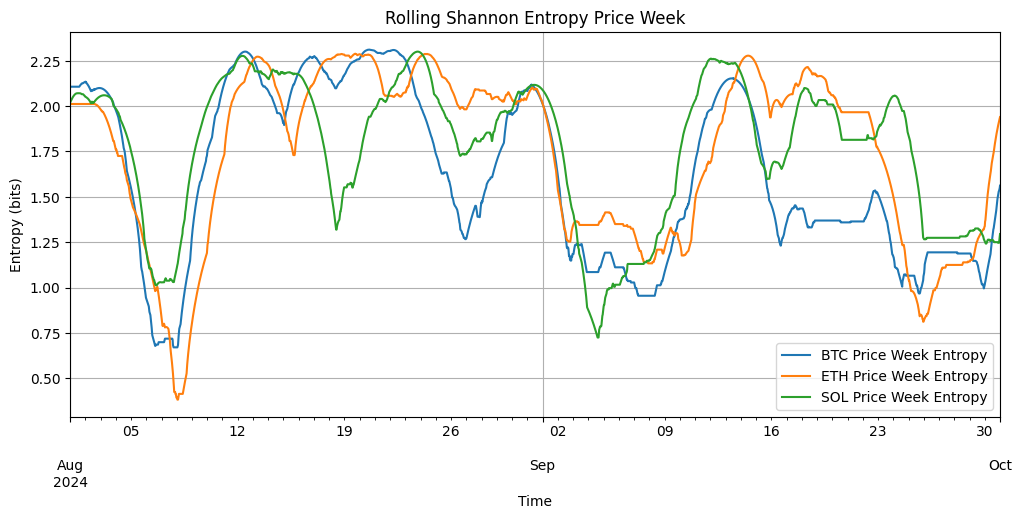

In [1272]:

plt.figure(figsize=(12, 5))
entropy_df_week_price['BTC-USDT'][entropy_df_week_price['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Price Week Entropy')
entropy_df_week_price['ETH-USDT'][entropy_df_week_price['ETH-USDT'].index >= '2024-08-01 00:00:00'].plot(label='ETH Price Week Entropy')
entropy_df_week_price['SOL-USDT'][entropy_df_week_price['SOL-USDT'].index >= '2024-08-01 00:00:00'].plot(label='SOL Price Week Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Price Week")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

In [1366]:
volumes_buy = df['buy_volume'][['BTC-USDT', 'ETH-USDT', 'SOL-USDT']]
disc_windows_week_story_volumes_buy_week = rolling_discretize_vectorized(volumes_buy.fillna(0), window_size=48 * 7, n_bins=5)

In [1367]:
entropy_df_week_volumes_buy_week = rolling_entropy(disc_windows_week_story_volumes_buy_week, window_size=48 * 7, n_bins = 5)

In [ ]:

plt.figure(figsize=(12, 5))
entropy_df_week_volumes_buy['BTC-USDT'][entropy_df_week_volumes_buy['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Volumes Buy Week Entropy')
entropy_df_week_volumes_buy['ETH-USDT'][entropy_df_week_volumes_buy['ETH-USDT'].index >= '2024-08-01 00:00:00'].plot(label='ETH Volumes Buy Week Entropy')
entropy_df_week_volumes_buy['SOL-USDT'][entropy_df_week_volumes_buy['SOL-USDT'].index >= '2024-08-01 00:00:00'].plot(label='SOL Volumes Buy Week Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Volumes Buy Week")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

In [1368]:
volumes_sell = df['setrain_df = df.loc['2024-08-01':'2024-08-31']
val_df   = df.loc['2024-09-01':'2024-09-15']
test_df  = df.loc['2024-09-16':'2024-09-30']ll_volume'][['BTC-USDT', 'ETH-USDT', 'SOL-USDT']]
disc_windows_week_story_volumes_sell_week = rolling_discretize_vectorized(volumes_sell.fillna(0), window_size=48 * 7, n_bins=5)

In [1369]:
entropy_df_volumes_sell_week = rolling_entropy(disc_windows_week_story_volumes_sell_week, window_size=48 * 7, n_bins = 5)

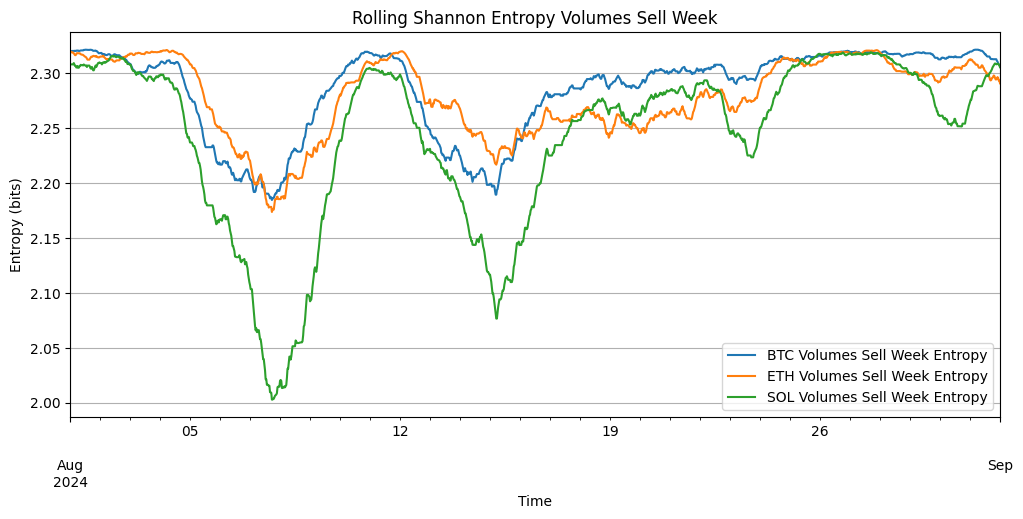

In [7495]:

plt.figure(figsize=(12, 5))
entropy_df_week['BTC-USDT'][entropy_df_week['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Volumes Sell Week Entropy')
entropy_df_week['ETH-USDT'][entropy_df_week['ETH-USDT'].index >= '2024-08-01 00:00:00'].plot(label='ETH Volumes Sell Week Entropy')
entropy_df_week['SOL-USDT'][entropy_df_week['SOL-USDT'].index >= '2024-08-01 00:00:00'].plot(label='SOL Volumes Sell Week Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Volumes Sell Week")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

In [ ]:
volumes_diff = (df['sell_volume'] - df['buy_volume'])[['BTC-USDT', 'ETH-USDT', 'SOL-USDT']]
disc_windows_week_story_volumes_diff = rolling_discretize_vectorized(volumes_diff.fillna(0), window_size=48 * 7, n_bins=5)

In [ ]:
entropy_df_week_volumes_diff = rolling_entropy(disc_windows_week_story_volumes_diff, window_size=48 * 7, n_bins = 5)

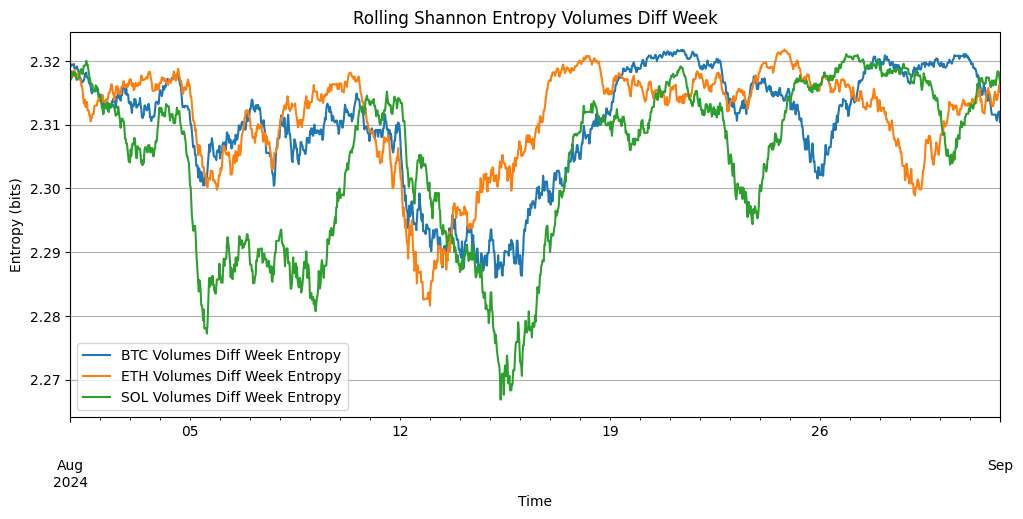

In [7498]:

plt.figure(figsize=(12, 5))
entropy_df_week['BTC-USDT'][entropy_df_week['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Volumes Diff Week Entropy')
entropy_df_week['ETH-USDT'][entropy_df_week['ETH-USDT'].index >= '2024-08-01 00:00:00'].plot(label='ETH Volumes Diff Week Entropy')
entropy_df_week['SOL-USDT'][entropy_df_week['SOL-USDT'].index >= '2024-08-01 00:00:00'].plot(label='SOL Volumes Diff Week Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Volumes Diff Week")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

# WEEK EXPERIMENTS

# BTC

In [1600]:
entropy_df_week_prices = entropy_df_week_price

In [1601]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_btc = pd.DataFrame(entropy_df_week_prices['BTC-USDT'].copy()[entropy_df_week_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_btc['trend'] = month_trend_btc
df_entropy_btc = df_entropy_btc.rename(columns={'BTC-USDT': 'entropy'})

train_df_btc = df_entropy_btc.loc['2024-08-01':'2024-09-14']
val_df_btc = df_entropy_btc.loc['2024-09-15':'2024-09-21']
test_df_btc = df_entropy_btc.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_btc[['entropy']])
X_val = scaler.transform(val_df_btc[['entropy']])
X_test = scaler.transform(test_df_btc[['entropy']])

y_train = train_df_btc['trend']
y_val = val_df_btc['trend']
y_test = test_df_btc['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0003, R² = -0.1259


In [1602]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_btc = pd.DataFrame(entropy_df_week_prices['BTC-USDT'].copy()[entropy_df_week_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_btc['trend'] = month_trend_btc
df_entropy_btc = df_entropy_btc.rename(columns={'BTC-USDT': 'entropy'})

train_df_btc = df_entropy_btc.loc['2024-08-01':'2024-09-14']
val_df_btc = df_entropy_btc.loc['2024-09-15':'2024-09-16']
test_df_btc = df_entropy_btc.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_btc[['entropy']])
X_val = scaler.transform(val_df_btc[['entropy']])
X_test = scaler.transform(test_df_btc[['entropy']])

y_train = train_df_btc['trend']
y_val = val_df_btc['trend']
y_test = test_df_btc['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0002, R² = -0.3334


# Signed

In [1603]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_btc = pd.DataFrame(entropy_df_week_prices['BTC-USDT'].copy()[entropy_df_week_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_btc['trend'] = month_trend_btc_signed
df_entropy_btc = df_entropy_btc.rename(columns={'BTC-USDT': 'entropy'})

train_df_btc = df_entropy_btc.loc['2024-08-01':'2024-09-14']
val_df_btc = df_entropy_btc.loc['2024-09-15':'2024-09-21']
test_df_btc = df_entropy_btc.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_btc[['entropy']])
X_val = scaler.transform(val_df_btc[['entropy']])
X_test = scaler.transform(test_df_btc[['entropy']])

y_train = train_df_btc['trend']
y_val = val_df_btc['trend']
y_test = test_df_btc['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0007, R² = -0.1526


In [1604]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_btc = pd.DataFrame(entropy_df_week_prices['BTC-USDT'].copy()[entropy_df_week_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_btc['trend'] = month_trend_btc_signed
df_entropy_btc = df_entropy_btc.rename(columns={'BTC-USDT': 'entropy'})

train_df_btc = df_entropy_btc.loc['2024-08-01':'2024-09-14']
val_df_btc = df_entropy_btc.loc['2024-09-15':'2024-09-16']
test_df_btc = df_entropy_btc.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_btc[['entropy']])
X_val = scaler.transform(val_df_btc[['entropy']])
X_test = scaler.transform(test_df_btc[['entropy']])

y_train = train_df_btc['trend']
y_val = val_df_btc['trend']
y_test = test_df_btc['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0004, R² = -0.6309


# Classification

In [1605]:
df_entropy_btc = pd.DataFrame(entropy_df_week_prices['BTC-USDT'].copy()[entropy_df_week_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'])
X_train = df_entropy_btc.loc['2024-08-01':'2024-09-14']
X_val = df_entropy_btc.loc['2024-09-15':'2024-09-16']
X_test = df_entropy_btc.loc['2024-09-16':'2024-09-30']

y_train = month_trend_btc_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_btc_classification.loc['2024-09-15':'2024-09-16']
y_test = month_trend_btc_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.55      1.00      0.71        53
        True       0.00      0.00      0.00        43

    accuracy                           0.55        96
   macro avg       0.28      0.50      0.36        96
weighted avg       0.30      0.55      0.39        96



/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1620]:
df_entropy_btc = pd.DataFrame(entropy_df_week_prices['BTC-USDT'].copy()[entropy_df_week_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'])
X_train = df_entropy_btc.loc['2024-08-01':'2024-09-14']
X_val = df_entropy_btc.loc['2024-09-15':'2024-09-21']
X_test = df_entropy_btc.loc['2024-09-16':'2024-09-30']

y_train = month_trend_btc_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_btc_classification.loc['2024-09-15':'2024-09-21']
y_test = month_trend_btc_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.57      1.00      0.72       191
        True       0.00      0.00      0.00       145

    accuracy                           0.57       336
   macro avg       0.28      0.50      0.36       336
weighted avg       0.32      0.57      0.41       336



/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Prices + Volumes

In [1622]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_BTC_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['BTC-USDT'][entropy_df_week_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['BTC-USDT'][entropy_df_volumes_sell_week['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['BTC-USDT'][entropy_df_week_volumes_buy_week['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['BTC-USDT'][entropy_df_week_volumes_diff['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_BTC_week['trend'] = month_trend_btc

train_df_BTC = entropy_combined_df_BTC_week.loc['2024-08-01':'2024-09-14']
val_df_BTC = entropy_combined_df_BTC_week.loc['2024-09-15':'2024-09-21']
test_df_BTC = entropy_combined_df_BTC_week.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_BTC[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_BTC[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_BTC[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_BTC['trend']
y_val = val_df_BTC['trend']
y_test = test_df_BTC['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_week = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0003, R² = -0.2605


In [1623]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_BTC_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['BTC-USDT'][entropy_df_week_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['BTC-USDT'][entropy_df_volumes_sell_week['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['BTC-USDT'][entropy_df_week_volumes_buy_week['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['BTC-USDT'][entropy_df_week_volumes_diff['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_BTC_week['trend'] = month_trend_btc

train_df_BTC = entropy_combined_df_BTC_week.loc['2024-08-01':'2024-09-14']
val_df_BTC = entropy_combined_df_BTC_week.loc['2024-09-15':'2024-09-16']
test_df_BTC = entropy_combined_df_BTC_week.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_BTC[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_BTC[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_BTC[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_BTC['trend']
y_val = val_df_BTC['trend']
y_test = test_df_BTC['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_week = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0003, R² = -0.9211


# Signed

In [1624]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_BTC_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['BTC-USDT'][entropy_df_week_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['BTC-USDT'][entropy_df_volumes_sell_week['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['BTC-USDT'][entropy_df_week_volumes_buy_week['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['BTC-USDT'][entropy_df_week_volumes_diff['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_BTC_week['trend'] = month_trend_btc_signed

train_df_BTC = entropy_combined_df_BTC_week.loc['2024-08-01':'2024-09-14']
val_df_BTC = entropy_combined_df_BTC_week.loc['2024-09-15':'2024-09-21']
test_df_BTC = entropy_combined_df_BTC_week.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_BTC[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_BTC[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_BTC[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_BTC['trend']
y_val = val_df_BTC['trend']
y_test = test_df_BTC['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_week = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0013, R² = -1.2566


In [1625]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_BTC_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['BTC-USDT'][entropy_df_week_prices['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['BTC-USDT'][entropy_df_volumes_sell_week['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['BTC-USDT'][entropy_df_week_volumes_buy_week['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['BTC-USDT'][entropy_df_week_volumes_diff['BTC-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_BTC_week['trend'] = month_trend_btc_signed

train_df_BTC = entropy_combined_df_BTC_week.loc['2024-08-01':'2024-09-14']
val_df_BTC = entropy_combined_df_BTC_week.loc['2024-09-15':'2024-09-16']
test_df_BTC = entropy_combined_df_BTC_week.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_BTC[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_BTC[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_BTC[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_BTC['trend']
y_val = val_df_BTC['trend']
y_test = test_df_BTC['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_week = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0002, R² = 0.2547


# Classification

In [1626]:
entropy_combined_df_btc_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['ETH-USDT'][entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['ETH-USDT'][entropy_df_volumes_sell_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['ETH-USDT'][entropy_df_week_volumes_buy_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['ETH-USDT'][entropy_df_week_volumes_diff['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_btc_week.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_btc_week.loc['2024-09-15':'2024-09-16']
X_test = entropy_combined_df_btc_week.loc['2024-09-16':'2024-09-30']

y_train = month_trend_btc_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_btc_classification.loc['2024-09-15':'2024-09-16']
y_test = month_trend_btc_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.55      1.00      0.71        53
        True       0.00      0.00      0.00        43

    accuracy                           0.55        96
   macro avg       0.28      0.50      0.36        96
weighted avg       0.30      0.55      0.39        96



/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1628]:
entropy_combined_df_btc_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['ETH-USDT'][entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['ETH-USDT'][entropy_df_volumes_sell_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['ETH-USDT'][entropy_df_week_volumes_buy_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['ETH-USDT'][entropy_df_week_volumes_diff['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_btc_week.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_btc_week.loc['2024-09-15':'2024-09-21']
X_test = entropy_combined_df_btc_week.loc['2024-09-16':'2024-09-30']

y_train = month_trend_btc_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_btc_classification.loc['2024-09-15':'2024-09-21']
y_test = month_trend_btc_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.57      1.00      0.72       191
        True       0.00      0.00      0.00       145

    accuracy                           0.57       336
   macro avg       0.28      0.50      0.36       336
weighted avg       0.32      0.57      0.41       336



/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# SOL

In [1629]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_SOL = pd.DataFrame(entropy_df_week_prices['SOL-USDT'].copy()[entropy_df_week_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_SOL['trend'] = month_trend_SOL
df_entropy_SOL = df_entropy_SOL.rename(columns={'SOL-USDT': 'entropy'})

train_df_SOL = df_entropy_SOL.loc['2024-08-01':'2024-09-14']
val_df_SOL = df_entropy_SOL.loc['2024-09-15':'2024-09-21']
test_df_SOL = df_entropy_SOL.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_SOL[['entropy']])
X_val = scaler.transform(val_df_SOL[['entropy']])
X_test = scaler.transform(test_df_SOL[['entropy']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0008, R² = -0.0465


In [1630]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_SOL = pd.DataFrame(entropy_df_week_prices['SOL-USDT'].copy()[entropy_df_week_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_SOL['trend'] = month_trend_SOL
df_entropy_SOL = df_entropy_SOL.rename(columns={'SOL-USDT': 'entropy'})

train_df_SOL = df_entropy_SOL.loc['2024-08-01':'2024-09-14']
val_df_SOL = df_entropy_SOL.loc['2024-09-15':'2024-09-16']
test_df_SOL = df_entropy_SOL.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_SOL[['entropy']])
X_val = scaler.transform(val_df_SOL[['entropy']])
X_test = scaler.transform(test_df_SOL[['entropy']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0003, R² = -0.4720


# Signed

In [1631]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_SOL = pd.DataFrame(entropy_df_week_prices['SOL-USDT'].copy()[entropy_df_week_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_SOL['trend'] = month_trend_SOL_signed
df_entropy_SOL = df_entropy_SOL.rename(columns={'SOL-USDT': 'entropy'})

train_df_SOL = df_entropy_SOL.loc['2024-08-01':'2024-09-14']
val_df_SOL = df_entropy_SOL.loc['2024-09-15':'2024-09-21']
test_df_SOL = df_entropy_SOL.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_SOL[['entropy']])
X_val = scaler.transform(val_df_SOL[['entropy']])
X_test = scaler.transform(test_df_SOL[['entropy']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0021, R² = -0.2633


In [1632]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_SOL = pd.DataFrame(entropy_df_week_prices['SOL-USDT'].copy()[entropy_df_week_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_SOL['trend'] = month_trend_SOL_signed
df_entropy_SOL = df_entropy_SOL.rename(columns={'SOL-USDT': 'entropy'})

train_df_SOL = df_entropy_SOL.loc['2024-08-01':'2024-09-14']
val_df_SOL = df_entropy_SOL.loc['2024-09-15':'2024-09-16']
test_df_SOL = df_entropy_SOL.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_SOL[['entropy']])
X_val = scaler.transform(val_df_SOL[['entropy']])
X_test = scaler.transform(test_df_SOL[['entropy']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0007, R² = -2.1947


# Classification

In [1633]:
df_entropy_SOL = pd.DataFrame(entropy_df_week_prices['SOL-USDT'].copy()[entropy_df_week_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'])
X_train = df_entropy_SOL.loc['2024-08-01':'2024-09-14']
X_val = df_entropy_SOL.loc['2024-09-15':'2024-09-16']
X_test = df_entropy_SOL.loc['2024-09-16':'2024-09-30']

y_train = month_trend_SOL_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_SOL_classification.loc['2024-09-15':'2024-09-16']
y_test = month_trend_SOL_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        44
        True       0.54      1.00      0.70        52

    accuracy                           0.54        96
   macro avg       0.27      0.50      0.35        96
weighted avg       0.29      0.54      0.38        96



/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1634]:
df_entropy_SOL = pd.DataFrame(entropy_df_week_prices['SOL-USDT'].copy()[entropy_df_week_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'])
X_train = df_entropy_SOL.loc['2024-08-01':'2024-09-14']
X_val = df_entropy_SOL.loc['2024-09-15':'2024-09-21']
X_test = df_entropy_SOL.loc['2024-09-16':'2024-09-30']

y_train = month_trend_SOL_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_SOL_classification.loc['2024-09-15':'2024-09-21']
y_test = month_trend_SOL_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       151
        True       0.55      1.00      0.71       185

    accuracy                           0.55       336
   macro avg       0.28      0.50      0.36       336
weighted avg       0.30      0.55      0.39       336



/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Price + Volumes

In [1653]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_SOL_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['SOL-USDT'][entropy_df_week_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['SOL-USDT'][entropy_df_volumes_sell_week['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['SOL-USDT'][entropy_df_week_volumes_buy_week['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['SOL-USDT'][entropy_df_week_volumes_diff['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_SOL_week['trend'] = month_trend_SOL

train_df_SOL = entropy_combined_df_SOL_week.loc['2024-08-01':'2024-09-14']
val_df_SOL = entropy_combined_df_SOL_week.loc['2024-09-15':'2024-09-21']
test_df_SOL = entropy_combined_df_SOL_week.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_week = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0008, R² = -0.0560


In [1654]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_SOL_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['SOL-USDT'][entropy_df_week_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['SOL-USDT'][entropy_df_volumes_sell_week['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['SOL-USDT'][entropy_df_week_volumes_buy_week['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['SOL-USDT'][entropy_df_week_volumes_diff['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_SOL_week['trend'] = month_trend_SOL

train_df_SOL = entropy_combined_df_SOL_week.loc['2024-08-01':'2024-09-14']
val_df_SOL = entropy_combined_df_SOL_week.loc['2024-09-15':'2024-09-16']
test_df_SOL = entropy_combined_df_SOL_week.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_week = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0004, R² = -0.8573


# Signed

In [1655]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_SOL_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['SOL-USDT'][entropy_df_week_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['SOL-USDT'][entropy_df_volumes_sell_week['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['SOL-USDT'][entropy_df_week_volumes_buy_week['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['SOL-USDT'][entropy_df_week_volumes_diff['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_SOL_week['trend'] = month_trend_SOL_signed

train_df_SOL = entropy_combined_df_SOL_week.loc['2024-08-01':'2024-09-14']
val_df_SOL = entropy_combined_df_SOL_week.loc['2024-09-15':'2024-09-21']
test_df_SOL = entropy_combined_df_SOL_week.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_week = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0039, R² = -1.3754


In [1656]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_SOL_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['SOL-USDT'][entropy_df_week_prices['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['SOL-USDT'][entropy_df_volumes_sell_week['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['SOL-USDT'][entropy_df_week_volumes_buy_week['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['SOL-USDT'][entropy_df_week_volumes_diff['SOL-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_SOL_week['trend'] = month_trend_SOL_signed

train_df_SOL = entropy_combined_df_SOL_week.loc['2024-08-01':'2024-09-14']
val_df_SOL = entropy_combined_df_SOL_week.loc['2024-09-15':'2024-09-16']
test_df_SOL = entropy_combined_df_SOL_week.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_SOL[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_SOL['trend']
y_val = val_df_SOL['trend']
y_test = test_df_SOL['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_week = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0002, R² = -0.0342


# Classification

In [1640]:
entropy_combined_df_SOL_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['ETH-USDT'][entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['ETH-USDT'][entropy_df_volumes_sell_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['ETH-USDT'][entropy_df_week_volumes_buy_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['ETH-USDT'][entropy_df_week_volumes_diff['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_SOL_week.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_SOL_week.loc['2024-09-15':'2024-09-16']
X_test = entropy_combined_df_SOL_week.loc['2024-09-16':'2024-09-30']

y_train = month_trend_SOL_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_SOL_classification.loc['2024-09-15':'2024-09-16']
y_test = month_trend_SOL_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.46      1.00      0.63        44
        True       0.00      0.00      0.00        52

    accuracy                           0.46        96
   macro avg       0.23      0.50      0.31        96
weighted avg       0.21      0.46      0.29        96



/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1641]:
entropy_combined_df_SOL_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['ETH-USDT'][entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['ETH-USDT'][entropy_df_volumes_sell_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['ETH-USDT'][entropy_df_week_volumes_buy_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['ETH-USDT'][entropy_df_week_volumes_diff['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_SOL_week.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_SOL_week.loc['2024-09-15':'2024-09-21']
X_test = entropy_combined_df_SOL_week.loc['2024-09-16':'2024-09-30']

y_train = month_trend_SOL_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_SOL_classification.loc['2024-09-15':'2024-09-21']
y_test = month_trend_SOL_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.55      0.79      0.65       151
        True       0.74      0.48      0.58       185

    accuracy                           0.62       336
   macro avg       0.64      0.63      0.62       336
weighted avg       0.65      0.62      0.61       336



# ETH

In [1642]:
trend_ETH = (np.abs(prices['ETH-USDT'] - prices['ETH-USDT'].shift(48)) / prices['ETH-USDT'].shift(48))
month_trend_ETH = trend_ETH[(trend_ETH.index >= '2024-08-01 00:00:00')]
trend_ETH_signed = ((prices['ETH-USDT'] - prices['ETH-USDT'].shift(48)) / prices['ETH-USDT'].shift(48))
month_trend_ETH_signed = trend_ETH_signed[(trend_ETH_signed.index >= '2024-08-01 00:00:00')]
trend_ETH_classification = (np.abs(prices['ETH-USDT'] - prices['ETH-USDT'].shift(48)) / prices['ETH-USDT'].shift(48)) > 0.02
month_trend_ETH_classification = trend_ETH_classification[(trend_ETH_classification.index >= '2024-08-01 00:00:00')]

In [1643]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_ETH = pd.DataFrame(entropy_df_week_prices['ETH-USDT'].copy()[entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_ETH['trend'] = month_trend_ETH
df_entropy_ETH = df_entropy_ETH.rename(columns={'ETH-USDT': 'entropy'})

train_df_ETH = df_entropy_ETH.loc['2024-08-01':'2024-09-14']
val_df_ETH = df_entropy_ETH.loc['2024-09-15':'2024-09-21']
test_df_ETH = df_entropy_ETH.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy']])
X_val = scaler.transform(val_df_ETH[['entropy']])
X_test = scaler.transform(test_df_ETH[['entropy']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0004, R² = -0.0201


In [1644]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_ETH = pd.DataFrame(entropy_df_week_prices['ETH-USDT'].copy()[entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_ETH['trend'] = month_trend_ETH
df_entropy_ETH = df_entropy_ETH.rename(columns={'ETH-USDT': 'entropy'})

train_df_ETH = df_entropy_ETH.loc['2024-08-01':'2024-09-14']
val_df_ETH = df_entropy_ETH.loc['2024-09-15':'2024-09-16']
test_df_ETH = df_entropy_ETH.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy']])
X_val = scaler.transform(val_df_ETH[['entropy']])
X_test = scaler.transform(test_df_ETH[['entropy']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0004, R² = 0.0500


# Signed

In [1645]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_ETH = pd.DataFrame(entropy_df_week_prices['ETH-USDT'].copy()[entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_ETH['trend'] = month_trend_ETH_signed
df_entropy_ETH = df_entropy_ETH.rename(columns={'ETH-USDT': 'entropy'})

train_df_ETH = df_entropy_ETH.loc['2024-08-01':'2024-09-14']
val_df_ETH = df_entropy_ETH.loc['2024-09-15':'2024-09-21']
test_df_ETH = df_entropy_ETH.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy']])
X_val = scaler.transform(val_df_ETH[['entropy']])
X_test = scaler.transform(test_df_ETH[['entropy']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0012, R² = -0.1839


In [1646]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_entropy_ETH = pd.DataFrame(entropy_df_week_prices['ETH-USDT'].copy()[entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'])
df_entropy_ETH['trend'] = month_trend_ETH_signed
df_entropy_ETH = df_entropy_ETH.rename(columns={'ETH-USDT': 'entropy'})

train_df_ETH = df_entropy_ETH.loc['2024-08-01':'2024-09-14']
val_df_ETH = df_entropy_ETH.loc['2024-09-15':'2024-09-16']
test_df_ETH = df_entropy_ETH.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy']])
X_val = scaler.transform(val_df_ETH[['entropy']])
X_test = scaler.transform(test_df_ETH[['entropy']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0009, R² = -0.9854


# Classification

In [1647]:
df_entropy_ETH = pd.DataFrame(entropy_df_week_prices['ETH-USDT'].copy()[entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'])
X_train = df_entropy_ETH.loc['2024-08-01':'2024-09-14']
X_val = df_entropy_ETH.loc['2024-09-15':'2024-09-16']
X_test = df_entropy_ETH.loc['2024-09-16':'2024-09-30']

y_train = month_trend_ETH_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_ETH_classification.loc['2024-09-15':'2024-09-16']
y_test = month_trend_ETH_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.44      1.00      0.61        42
        True       0.00      0.00      0.00        54

    accuracy                           0.44        96
   macro avg       0.22      0.50      0.30        96
weighted avg       0.19      0.44      0.27        96



/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1648]:
entropy_combined_df_ETH_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['ETH-USDT'][entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['ETH-USDT'][entropy_df_volumes_sell_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['ETH-USDT'][entropy_df_week_volumes_buy_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['ETH-USDT'][entropy_df_week_volumes_diff['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_ETH_week.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_ETH_week.loc['2024-09-15':'2024-09-21']
X_test = entropy_combined_df_ETH_week.loc['2024-09-16':'2024-09-30']

y_train = month_trend_ETH_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_ETH_classification.loc['2024-09-15':'2024-09-21']
y_test = month_trend_ETH_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.43      1.00      0.60       145
        True       0.00      0.00      0.00       191

    accuracy                           0.43       336
   macro avg       0.22      0.50      0.30       336
weighted avg       0.19      0.43      0.26       336



/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Price + Volumes

In [1649]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_ETH_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['ETH-USDT'][entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['ETH-USDT'][entropy_df_volumes_sell_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['ETH-USDT'][entropy_df_week_volumes_buy_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['ETH-USDT'][entropy_df_week_volumes_diff['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_ETH_week['trend'] = month_trend_ETH

train_df_ETH = entropy_combined_df_ETH_week.loc['2024-08-01':'2024-09-14']
val_df_ETH = entropy_combined_df_ETH_week.loc['2024-09-15':'2024-09-21']
test_df_ETH = entropy_combined_df_ETH_week.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_week = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0004, R² = -0.0628


In [1650]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_ETH_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['ETH-USDT'][entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['ETH-USDT'][entropy_df_volumes_sell_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['ETH-USDT'][entropy_df_week_volumes_buy_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['ETH-USDT'][entropy_df_week_volumes_diff['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_ETH_week['trend'] = month_trend_ETH

train_df_ETH = entropy_combined_df_ETH_week.loc['2024-08-01':'2024-09-14']
val_df_ETH = entropy_combined_df_ETH_week.loc['2024-09-15':'2024-09-16']
test_df_ETH = entropy_combined_df_ETH_week.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_week = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0004, R² = 0.0271


# Signed

In [1651]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_ETH_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['ETH-USDT'][entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['ETH-USDT'][entropy_df_volumes_sell_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['ETH-USDT'][entropy_df_week_volumes_buy_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['ETH-USDT'][entropy_df_week_volumes_diff['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_ETH_week['trend'] = month_trend_ETH_signed

train_df_ETH = entropy_combined_df_ETH_week.loc['2024-08-01':'2024-09-14']
val_df_ETH = entropy_combined_df_ETH_week.loc['2024-09-15':'2024-09-21']
test_df_ETH = entropy_combined_df_ETH_week.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_week = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0014, R² = -0.3727


In [1652]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

entropy_combined_df_ETH_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['ETH-USDT'][entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['ETH-USDT'][entropy_df_volumes_sell_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['ETH-USDT'][entropy_df_week_volumes_buy_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['ETH-USDT'][entropy_df_week_volumes_diff['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
entropy_combined_df_ETH_week['trend'] = month_trend_ETH_signed

train_df_ETH = entropy_combined_df_ETH_week.loc['2024-08-01':'2024-09-14']
val_df_ETH = entropy_combined_df_ETH_week.loc['2024-09-15':'2024-09-16']
test_df_ETH = entropy_combined_df_ETH_week.loc['2024-09-16':'2024-09-30']

scaler = StandardScaler()

X_train = scaler.fit_transform(train_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_val = scaler.transform(val_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])
X_test = scaler.transform(test_df_ETH[['entropy_price', 'entropy_volume_buy', 'entropy_volume_sell']])

y_train = train_df_ETH['trend']
y_val = val_df_ETH['trend']
y_test = test_df_ETH['trend']

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

def evaluate(X, y, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return y_pred

val_pred_week = evaluate(X_val, y_val, "Validation")


Validation: MSE = 0.0012, R² = -1.6098


# Classification

In [1657]:
entropy_combined_df_ETH_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['ETH-USDT'][entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['ETH-USDT'][entropy_df_volumes_sell_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['ETH-USDT'][entropy_df_week_volumes_buy_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['ETH-USDT'][entropy_df_week_volumes_diff['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_ETH_week.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_ETH_week.loc['2024-09-15':'2024-09-16']
X_test = entropy_combined_df_ETH_week.loc['2024-09-16':'2024-09-30']

y_train = month_trend_ETH_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_ETH_classification.loc['2024-09-15':'2024-09-16']
y_test = month_trend_ETH_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.44      1.00      0.61        42
        True       0.00      0.00      0.00        54

    accuracy                           0.44        96
   macro avg       0.22      0.50      0.30        96
weighted avg       0.19      0.44      0.27        96



/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1658]:
entropy_combined_df_ETH_week = pd.DataFrame({
    'entropy_price': entropy_df_week_prices['ETH-USDT'][entropy_df_week_prices['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_sell': entropy_df_volumes_sell_week['ETH-USDT'][entropy_df_volumes_sell_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_buy': entropy_df_week_volumes_buy_week['ETH-USDT'][entropy_df_week_volumes_buy_week['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
    'entropy_volume_diff': entropy_df_week_volumes_diff['ETH-USDT'][entropy_df_week_volumes_diff['ETH-USDT'].copy().index >= '2024-08-01 00:00:00'],
})
X_train = entropy_combined_df_ETH_week.loc['2024-08-01':'2024-09-14']
X_val = entropy_combined_df_ETH_week.loc['2024-09-15':'2024-09-21']
X_test = entropy_combined_df_ETH_week.loc['2024-09-16':'2024-09-30']

y_train = month_trend_ETH_classification.loc['2024-08-01':'2024-09-14']
y_val = month_trend_ETH_classification.loc['2024-09-15':'2024-09-21']
y_test = month_trend_ETH_classification.loc['2024-09-16':'2024-09-30']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)
print("Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Set:
              precision    recall  f1-score   support

       False       0.43      1.00      0.60       145
        True       0.00      0.00      0.00       191

    accuracy                           0.43       336
   macro avg       0.22      0.50      0.30       336
weighted avg       0.19      0.43      0.26       336



/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kt/myenv311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
prices = df['close'][['BTC-USDT', 'ETH-USDT', 'SOL-USDT']]
disc_windows_month_story_prices = rolling_discretize_vectorized(prices.fillna(0), window_size=48 * 15, n_bins=5)
entropy_df_month_price = rolling_entropy(disc_windows_month_story_prices, window_size=48 * 15, n_bins = 5)
plt.figure(figsize=(12, 5))
entropy_df_month_price['BTC-USDT'][entropy_df_month_price['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Price Week Entropy')
entropy_df_month_price['ETH-USDT'][entropy_df_month_price['ETH-USDT'].index >= '2024-08-01 00:00:00'].plot(label='ETH Price Week Entropy')
entropy_df_month_price['SOL-USDT'][entropy_df_month_price['SOL-USDT'].index >= '2024-08-01 00:00:00'].plot(label='SOL Price Week Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Price Month")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

In [ ]:
volumes_buy = df['buy_volume'][['BTC-USDT', 'ETH-USDT', 'SOL-USDT']]
disc_windows_month_story_volumes_buy = rolling_discretize_vectorized(volumes_buy.fillna(0), window_size=48 * 15, n_bins=5)
entropy_df_month_volumes_buy = rolling_entropy(disc_windows_month_story_volumes_buy, window_size=48 * 15, n_bins = 5)
plt.figure(figsize=(12, 5))
entropy_df_month_volumes_buy['BTC-USDT'][entropy_df_month_volumes_buy['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Price Week Entropy')
entropy_df_month_volumes_buy['ETH-USDT'][entropy_df_month_volumes_buy['ETH-USDT'].index >= '2024-08-01 00:00:00'].plot(label='ETH Price Week Entropy')
entropy_df_month_volumes_buy['SOL-USDT'][entropy_df_month_volumes_buy['SOL-USDT'].index >= '2024-08-01 00:00:00'].plot(label='SOL Price Week Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Price Week")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

In [ ]:
volumes_sell = df['sell_volume'][['BTC-USDT', 'ETH-USDT', 'SOL-USDT']]
disc_windows_month_story_volumes_sell = rolling_discretize_vectorized(volumes_sell.fillna(0), window_size=48 * 15, n_bins=5)
entropy_df_month_volumes_sell = rolling_entropy(disc_windows_month_story_volumes_sell, window_size=48 * 15, n_bins = 5)

plt.figure(figsize=(12, 5))
entropy_df_month_volumes_sell['BTC-USDT'][entropy_df_month_volumes_sell['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Volumes Sell Week Entropy')
entropy_df_month_volumes_sell['ETH-USDT'][entropy_df_month_volumes_sell['ETH-USDT'].index >= '2024-08-01 00:00:00'].plot(label='ETH Volumes Sell Week Entropy')
entropy_df_month_volumes_sell['SOL-USDT'][entropy_df_month_volumes_sell['SOL-USDT'].index >= '2024-08-01 00:00:00'].plot(label='SOL Volumes Sell Week Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Volumes Sell Week")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()

In [ ]:
volumes_diff = (df['sell_volume'] - df['buy_volume'])[['BTC-USDT', 'ETH-USDT', 'SOL-USDT']]
disc_windows_week_story_volumes_diff = rolling_discretize_vectorized(volumes_diff.fillna(0), window_size=48 * 15, n_bins=5)
entropy_df_week_volumes_diff = rolling_entropy(disc_windows_week_story_volumes_diff, window_size=48 * 15, n_bins = 5)

plt.figure(figsize=(12, 5))
entropy_df_week_volumes_diff['BTC-USDT'][entropy_df_week_volumes_diff['BTC-USDT'].index >= '2024-08-01 00:00:00'].plot(label='BTC Volumes Diff Week Entropy')
entropy_df_week_volumes_diff['ETH-USDT'][entropy_df_week_volumes_diff['ETH-USDT'].index >= '2024-08-01 00:00:00'].plot(label='ETH Volumes Diff Week Entropy')
entropy_df_week_volumes_diff['SOL-USDT'][entropy_df_week_volumes_diff['SOL-USDT'].index >= '2024-08-01 00:00:00'].plot(label='SOL Volumes Diff Week Entropy')
plt.legend()
plt.title("Rolling Shannon Entropy Volumes Diff Week")
plt.xlabel("Time")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()